# PUBG Death Data
***

**Name**: Jacob Tran, Neil Nguyen, Phi Trang

***

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
%matplotlib inline

### Import Data
***

In [2]:
local_path = 'PUBG Death 1million.csv'
PUBG_death = pd.read_csv(local_path)

PUBG_death.head(10)

killed_by    killer_name  killer_placement  killer_position_x  \
0          M249  0932313woaini               7.0           529007.7   
1        Kar98k     arunrunrun               6.0           440414.8   
2  Down and Out      Rabbit812               6.0           439923.2   
3  Down and Out  0932313woaini               7.0           530312.4   
4        SCAR-L      sa11y1126               3.0           466609.2   
5      Bluezone            NaN               NaN                NaN   
6  Down and Out   AT_maozaomao               7.0           529282.9   
7          S686     ruokuisama               2.0           434772.1   
8       Grenade        LinGend               1.0           325518.5   
9       Falling            NaN               NaN                NaN   

   killer_position_y      map  \
0           440035.5  MIRAMAR   
1           285918.1  MIRAMAR   
2           282419.0  MIRAMAR   
3           440969.0  MIRAMAR   
4           409546.3  MIRAMAR   
5                NaN  MIRAMAR   
6           437029.2  MIRAMAR   
7           280943.7  MIRAMAR   
8           356314.3  MIRAMAR   
9                NaN  MIRAMAR   

                                            match_id  time       victim_name  \
0  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1209          GODusopp   
1  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1096       TheOnly_0ne   
2  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1096            NOAIM1   
3  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1209        liweiliwei   
4  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1793            PKBskg   
5  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1505     0932313woaini   
6  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1209       zhao-you-zi   
7  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...   180           ysuperc   
8  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...   268  iphoneseven_user   
9  2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...  1341     178cm80kg15cm   

   victim_placement  victim_position_x  victim_position_y  
0              11.0           526111.8           432951.8  
1              13.0           438853.4           280981.6  
2              13.0           437034.8           282477.7  
3              11.0           528304.4           439696.8  
4               5.0           462901.5           403350.5  
5               7.0           495367.2           419491.3  
6              11.0           527772.9           437289.5  
7              25.0           435505.9           280925.8  
8               NaN           325673.8           356267.9  
9               9.0           516814.6           507303.8

In [3]:
miramar_Map = PUBG_death.loc[(PUBG_death["map"]=="MIRAMAR")]
erangel_Map = PUBG_death.loc[(PUBG_death["map"]=="ERANGEL")]

miramar_Map.head(10)
erangel_Map.head(10)

killed_by      killer_name  killer_placement  killer_position_x  \
163  Down and Out     HZCBIUBIUBIU               3.0           417104.3   
164          M416  RunFastKneeGrow              19.0           569463.8   
165         M16A4     Daniellalala               3.0           422891.6   
166          UMP9        orangecsl              18.0           583931.7   
167          M416      niuhongfei1               6.0           271145.1   
168       Grenade     THUGNIFlCENT              16.0           575606.3   
169        SCAR-L             iuer               5.0           305245.0   
170         Punch      niuhongfei1               6.0           161409.1   
171        SCAR-L            Man_A               5.0           297546.0   
172           AKM        fredlugis               2.0           317756.6   

     killer_position_y      map  \
163           481058.3  ERANGEL   
164           381541.6  ERANGEL   
165           484844.6  ERANGEL   
166           480778.6  ERANGEL   
167           562685.8  ERANGEL   
168           503138.2  ERANGEL   
169           418389.5  ERANGEL   
170           291696.2  ERANGEL   
171           424845.8  ERANGEL   
172           542838.4  ERANGEL   

                                              match_id  time  \
163  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...   622   
164  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...   136   
165  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...   785   
166  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...   436   
167  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...  1511   
168  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...   801   
169  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...  1033   
170  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...   290   
171  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...  1074   
172  2U4GBNA0YmkAtDV8BIUtsazckNPT4YjBr8TFfiPl9ZSsCr...  1771   

          victim_name  victim_placement  victim_position_x  victim_position_y  
163  RealCoconutjuice              19.0           413859.3           484157.8  
164    colonelcrunker              25.0           569128.9           381294.2  
165         Le-Passer              17.0           422423.9           483145.9  
166          Jamarkus              16.0           585560.0           483584.9  
167      Blind_LeeSin               7.0           270507.0           562770.3  
168      THUGNIFlCENT              16.0           575606.3           503138.2  
169          Crash763              12.0           305867.8           412365.8  
170              talm              24.0           161335.2           291666.2  
171    SlightlyPotato              12.0           305198.9           411935.3  
172         KissLater               NaN           317642.2           540568.9

In [4]:
bad_miramar_match_id = list(miramar_Map.loc[miramar_Map["killed_by"]=="Down and Out", "match_id"].drop_duplicates())
solo_miramar = miramar_Map.loc[~miramar_Map["match_id"].isin(bad_miramar_match_id)]

bad_erangel_match_id = list(erangel_Map.loc[erangel_Map["killed_by"]=="Down and Out", "match_id"].drop_duplicates())
solo_erangel = erangel_Map.loc[~erangel_Map["match_id"].isin(bad_erangel_match_id)]

solo_miramar.head(10) # 35,000 entries
solo_erangel.head(10) # 190,000 entries

killed_by       killer_name  killer_placement  killer_position_x  \
256    Kar98k            Chewwe              35.0           375243.2   
257       AKM        jiuxijiuxi              56.0           627858.1   
258      M416         RealSushi              27.0           710350.6   
259    Vector         RealSushi              27.0           700144.3   
260   Mini 14             XiZiE              14.0           511061.8   
261      M416  WG-qun-668089289              18.0           489867.3   
262      UMP9       PappyFlappy               1.0           412355.6   
263  Bluezone               NaN               NaN                NaN   
264       AKM           aaromdl               6.0           511266.6   
265       Uaz          mrozbrne              27.0           560496.6   

     killer_position_y      map  \
256           422101.2  ERANGEL   
257           379821.1  ERANGEL   
258           357266.2  ERANGEL   
259           342623.9  ERANGEL   
260           467855.6  ERANGEL   
261           448659.6  ERANGEL   
262           448347.1  ERANGEL   
263                NaN  ERANGEL   
264           465398.6  ERANGEL   
265           501884.1  ERANGEL   

                                              match_id  time  \
256  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...   638   
257  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...   207   
258  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...   390   
259  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...    84   
260  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1142   
261  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1358   
262  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1020   
263  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1504   
264  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1614   
265  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1181   

          victim_name  victim_placement  victim_position_x  victim_position_y  
256      KingCobraGut              52.0           381097.3           448397.5  
257  Thecrossbowstore              72.0           628253.9           378554.9  
258         whiteodie              61.0           707263.8           357796.7  
259        UpInTheMix              95.0           700660.9           344219.4  
260           KinRing              28.0           506420.9           472782.0  
261       MeesterPaul              20.0           489101.5           452487.3  
262            Chewwe              35.0           410779.8           446562.4  
263         RealSushi              27.0                0.0                0.0  
264       billcosbers              11.0           502331.6           461972.0  
265          mrozbrne              27.0           560496.6           501884.1

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,20))
ax[0].set_title("Death location in PUBG", fontsize=20)
ax[0].set_xlabel("x coordinate", fontsize=15)
ax[0].set_ylabel("y coordinate", fontsize=15)
ax[0].grid(True, alpha=0.69)

ax[1].set_title("Miramar Solo Deaths", fontsize=20)
ax[1].set_xlabel("x coordinate", fontsize=15)
ax[1].set_ylabel("y coordinate", fontsize=15)
ax[1].grid(True, alpha=0.69)

ax[2].set_title("Erangel Solo Deaths", fontsize=20)
ax[2].set_xlabel("x coordinate", fontsize=15)
ax[2].set_ylabel("y coordinate", fontsize=15)
ax[2].grid(True, alpha=0.69)

ax[0].scatter(x=list(PUBG_death['victim_position_x']), y=list(-1 * PUBG_death['victim_position_y']), s=0.5, color="maroon", alpha=0.69)
ax[1].scatter(x=list(solo_miramar['victim_position_x']), y=list(-1 * solo_miramar['victim_position_y']), s=0.5, color="#696969")
ax[2].scatter(x=list(solo_erangel['victim_position_x']), y=list(-1 * solo_erangel['victim_position_y']), s=0.5, color="steelblue")
              
plt.show()

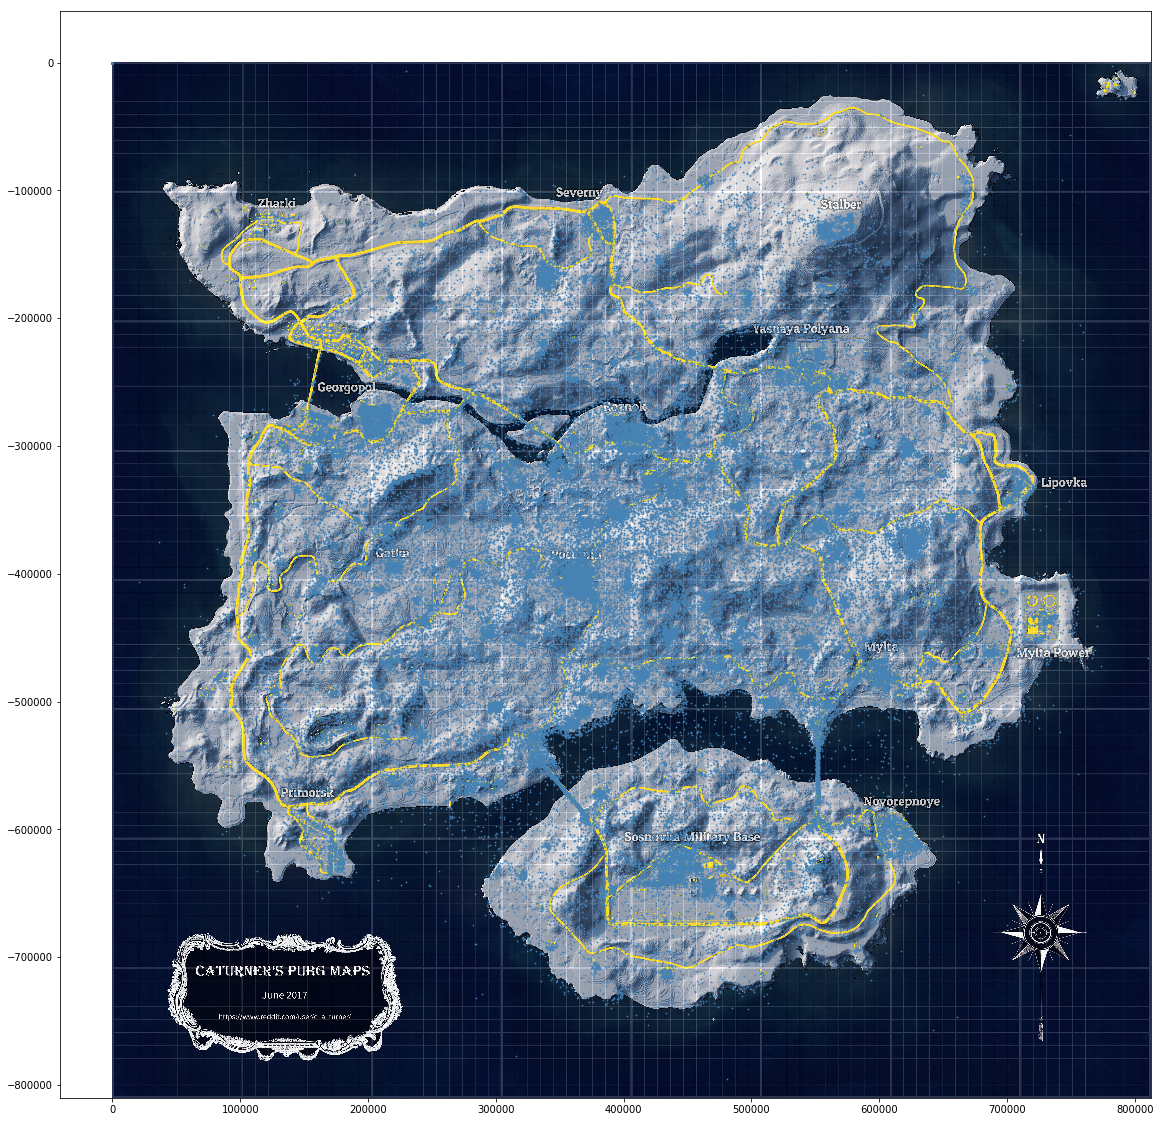

In [61]:
plt.subplots(figsize = (20,20))
im = plt.imread('erangelMap.jpg')
# implot = plt.imshow(im,extent=[0, 813000, -810000, 0],zorder=1)
# implot = plt.imshow(im,extent=[0, 813000, -810000, 0],zorder=1)

plt.scatter(x=list(solo_erangel['victim_position_x']), y=list(-1*solo_erangel['victim_position_y']), s=0.5, color="steelblue", zorder=2)

plt.show()

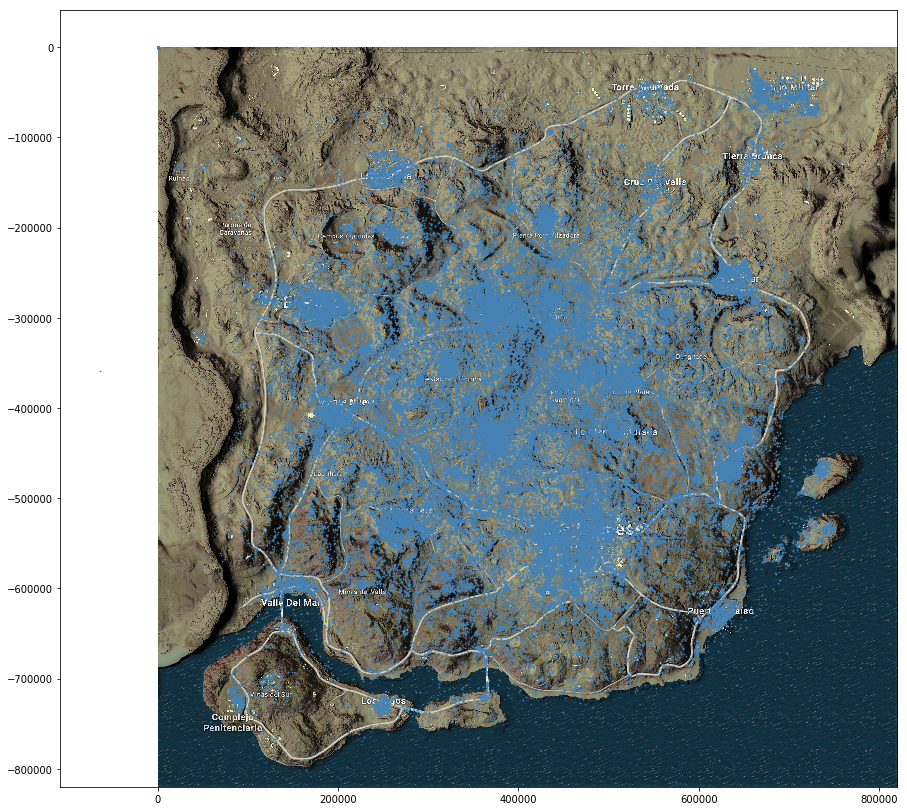

In [68]:
plt.subplots(figsize = (15,15))
im = plt.imread('miramarMap.png')
implot = plt.imshow(im,extent=[0, 820000, -820000, 0],zorder=1)
plt.scatter(x=list(miramar_Map['victim_position_x']), y=list(-1*miramar_Map['victim_position_y']), s=0.5, color="steelblue", zorder=2)

plt.show()